In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
data_url = "https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv"
df = pd.read_csv(data_url)
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


## Date and Time Series

In [3]:
#converting to datetime object
df['Date'] = pd.to_datetime(df['Date'],format="%Y-%m-%d %I-%p")
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [4]:
#getting day
print(df.iloc[0,0].day_name()," - ",df.iloc[0,0])

Friday  -  2020-03-13 20:00:00


In [5]:
# getting days from a list of dates
df['Date'].iloc[:100:20].dt.day_name()

0        Friday
20       Friday
40     Thursday
60    Wednesday
80      Tuesday
Name: Date, dtype: object

In [6]:
# greater than 2019
df[(df['Date'] >= '2018') & (df['Date'] < '2019')]

,Date,Symbol,Open,High,Low,Close,Volume
10509,2018-12-31 23:00:00,ETHUSD,130.62,131.36,130.20,130.53,869026.39
10510,2018-12-31 22:00:00,ETHUSD,129.97,131.00,129.07,130.62,1972726.62
10511,2018-12-31 21:00:00,ETHUSD,130.90,130.90,129.47,129.97,1079617.65
10512,2018-12-31 20:00:00,ETHUSD,131.17,131.58,130.36,130.90,1775465.69
10513,2018-12-31 19:00:00,ETHUSD,134.83,134.90,128.50,131.17,3380282.07
...,...,...,...,...,...,...,...
19264,2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69
19265,2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11
19266,2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37
19267,2018-01-01 01:00:00,ETHUSD,734.59,735.10,730.01,730.02,1886624.01


## min and max

In [7]:
print(df['Date'].min())
print(df['Date'].max())
print(df['Date'].max() - df['Date'].min())

2017-07-01 11:00:00
2020-03-13 20:00:00
986 days 09:00:00


## Fuctions under DateTime as Index

when we use date as the index, we could directly access the data that we want from specific dates easily

In [8]:
df.set_index('Date',inplace=True)

In [9]:
# all the data from 2017 to 2019
df.loc['2017':'2019']

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84
...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99


In [10]:
# all the data from 2019 january
df.loc['2019-1']

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2019-01-31 23:00:00,ETHUSD,106.24,106.24,105.53,105.79,154196.70
2019-01-31 22:00:00,ETHUSD,105.75,106.35,105.61,106.24,287372.14
2019-01-31 21:00:00,ETHUSD,106.23,106.23,105.64,105.75,329152.63
2019-01-31 20:00:00,ETHUSD,105.71,106.25,105.49,106.23,460235.89
2019-01-31 19:00:00,ETHUSD,105.11,105.84,105.05,105.71,440680.10
...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43


## Resampling

The data is now recorded per each hour of the day for every day for some amount of years. resampling allows the conversion of this data from hours to day or week or per year

In [11]:
df.head()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [12]:
"""
This will take the average for all the hours in a day and give put that value per day for all the fields
and resample based on year

D - day
W - week
Y - year
and so on
"""

df.resample('D').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-01,266.581538,268.698462,261.861538,265.284615,2.198771e+06
2017-07-02,268.870833,272.438750,266.422083,269.782500,2.177595e+06
2017-07-03,279.241667,280.774167,276.599583,278.882083,1.459015e+06
2017-07-04,277.042083,278.034167,275.117500,276.743333,1.254579e+06
2017-07-05,265.147917,267.120000,262.834583,265.025833,1.797923e+06
...,...,...,...,...,...
2020-03-09,200.680417,203.311667,197.860000,200.818333,3.804752e+06
2020-03-10,201.672083,203.155000,199.912500,201.577500,1.553063e+06
2020-03-11,196.155833,197.684167,194.100833,195.910417,1.894868e+06


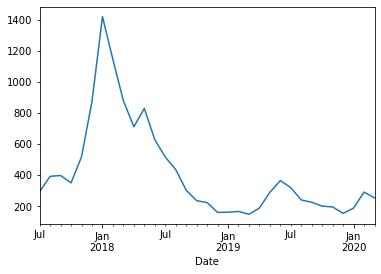

In [13]:
# resampling based on year
df.resample('M').max()['High'].plot()
plt.show()

In [14]:
# resampling with different attributes for different columns
df.resample('M').agg({'High':'mean','Low':'min','Open':'max','Volume':'sum'}).head()

,High,Low,Open,Volume
Date,,,,
2017-07-31,222.516126,130.26,292.54,1.818282e+09
2017-08-31,300.082661,200.82,389.78,1.529929e+09
2017-09-30,301.120875,202.25,395.54,1.678947e+09
2017-10-31,306.866976,275.46,348.45,8.155377e+08
2017-11-30,357.946500,278.88,508.82,1.974056e+09
